In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
data_set_location  = 'data/'
os.listdir(data_set_location)

['products.csv',
 'orders.csv',
 '.DS_Store',
 'order_products__train.csv',
 'departments.csv',
 'aisles.csv',
 'order_products__prior.csv',
 'sample_submission.csv']

In [3]:

departments_df = pd.read_csv(data_set_location + 'departments.csv')
aisles_df = pd.read_csv(data_set_location + 'aisles.csv')


orders_df = pd.read_csv(data_set_location + 'orders.csv')
product_df = pd.read_csv(data_set_location + 'products.csv')

order_products_train_df = pd.read_csv(data_set_location + 'order_products__train.csv')
order_products_prior_df = pd.read_csv(data_set_location + 'order_products__prior.csv')



## Department

In [4]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


# Aisle

In [6]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


# Order

In [8]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
print("Number of unique users" ,  len( orders_df.user_id.unique() ))
print("Number of unique orders" ,  len( orders_df.order_id.unique() ))

Number of unique users 206209
Number of unique orders 3421083


In [10]:
orders_df.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

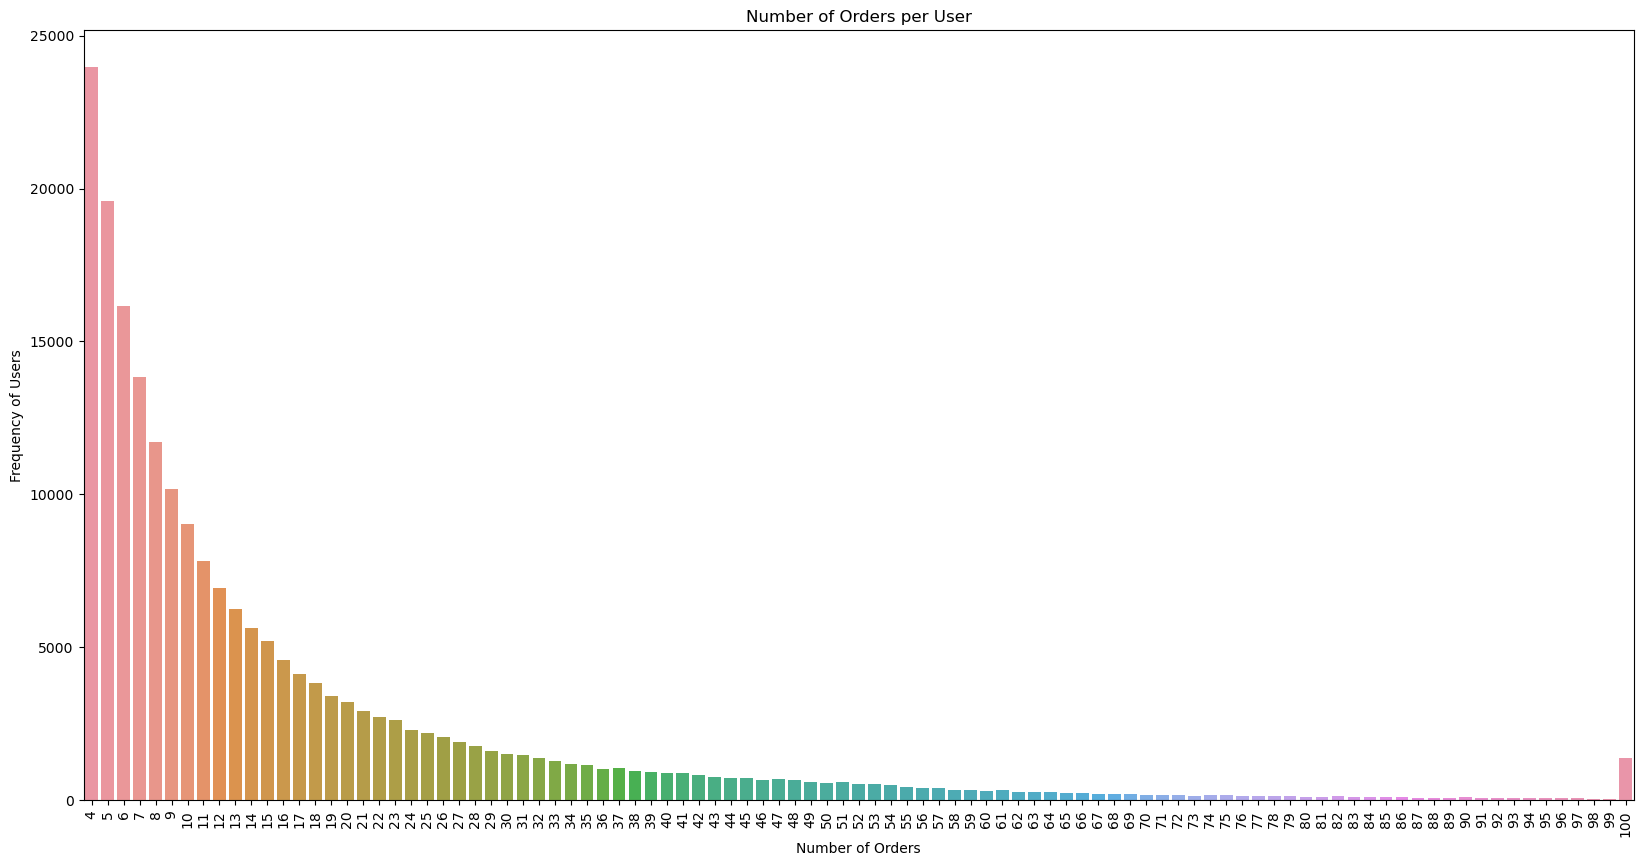

In [11]:
order_df_user_order_count = orders_df.groupby('user_id')['order_number'].max()

order_df_user_order_count = order_df_user_order_count.value_counts()

fig , axis = plt.subplots(figsize=(20,10))
axis = sns.barplot( x = order_df_user_order_count.index , y =order_df_user_order_count.values)

axis.set_title('Number of Orders per User')

axis.set_xlabel('Number of Orders')

axis.xaxis.set_tick_params(rotation=90)

axis.set_ylabel('Frequency of Users')

fig.savefig('img/Frequncy of user orders.png')


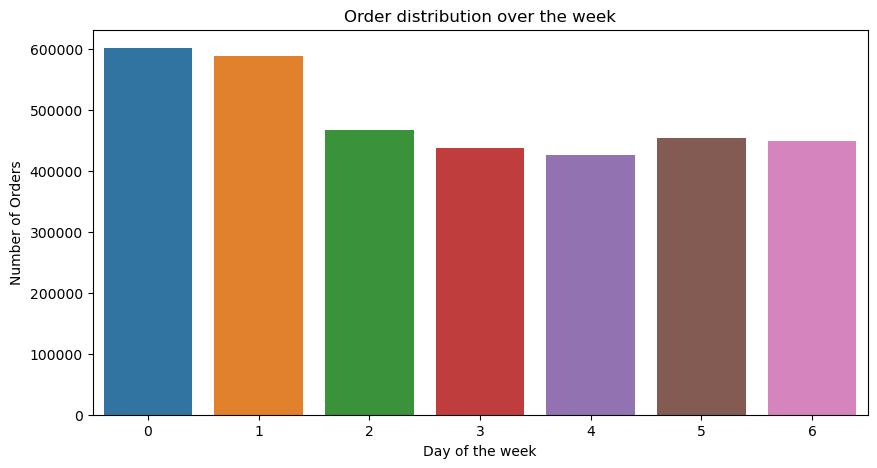

In [12]:
# order distribution over the week

fig , axis =  plt.subplots(figsize=(10,5))

axis = sns.countplot( x = orders_df.order_dow)


axis.set_title('Order distribution over the week')

axis.set_xlabel('Day of the week')

axis.set_ylabel('Number of Orders')

fig.savefig('img/Order distribution over the week.png')

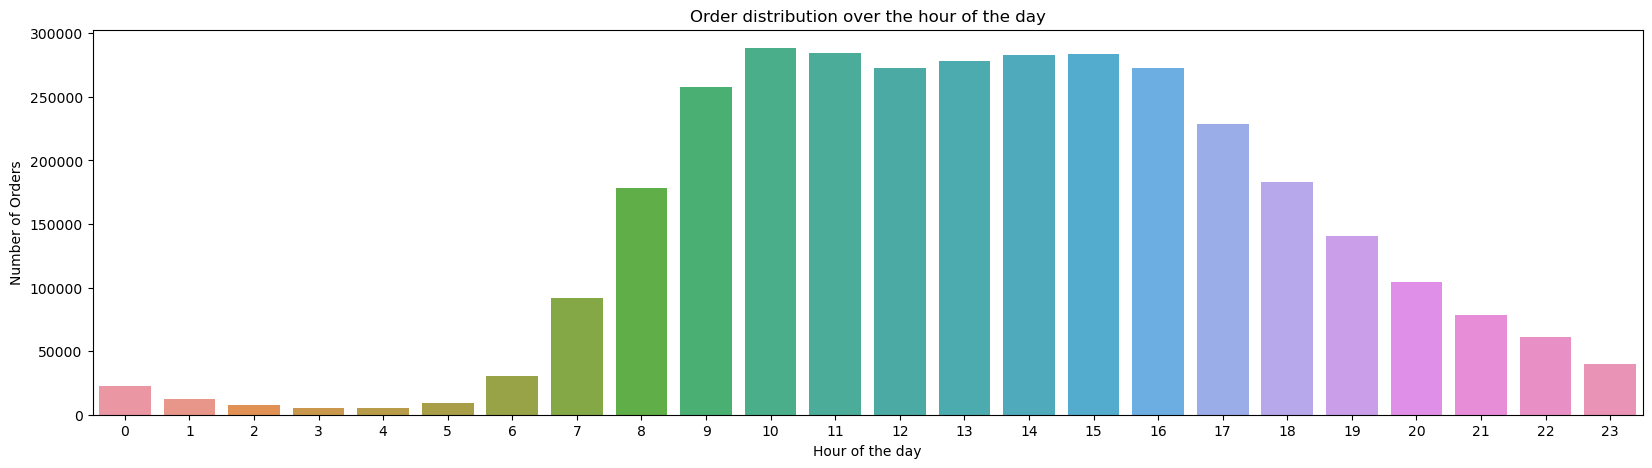

In [13]:
# order distribution over the hour of the day

fig , axis =  plt.subplots(figsize=(20 , 5))

axis =  sns.countplot( x = orders_df.order_hour_of_day)

axis.set_title('Order distribution over the hour of the day')

axis.set_xlabel('Hour of the day')

axis.set_ylabel('Number of Orders')

fig.savefig('img/Order distribution over the hour of the day.png')

### What day and time do notice the orders 

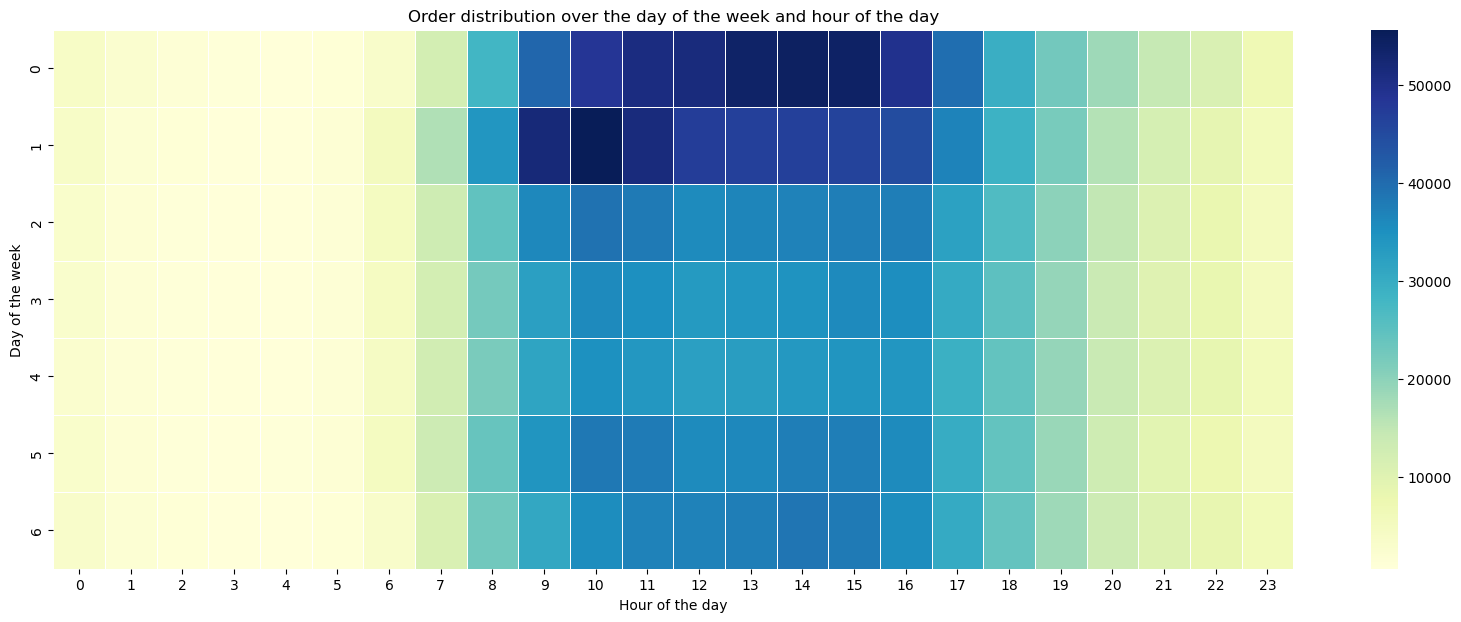

In [14]:
orders_df_by_time_day = orders_df.groupby(['order_dow' , 'order_hour_of_day'])['order_number'].count().reset_index()


orders_df_by_time_day = orders_df_by_time_day.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')


fig , axis  =  plt.subplots(figsize=(20,7))

axis =  sns.heatmap(orders_df_by_time_day , linewidths=0.5 , cmap='YlGnBu')

axis.set_title('Order distribution over the day of the week and hour of the day')

axis.set_xlabel('Hour of the day')

axis.set_ylabel('Day of the week')

fig.savefig('img/Order distribution over the day of the week and hour of the day.png')

### How long does it take for a user to make another order

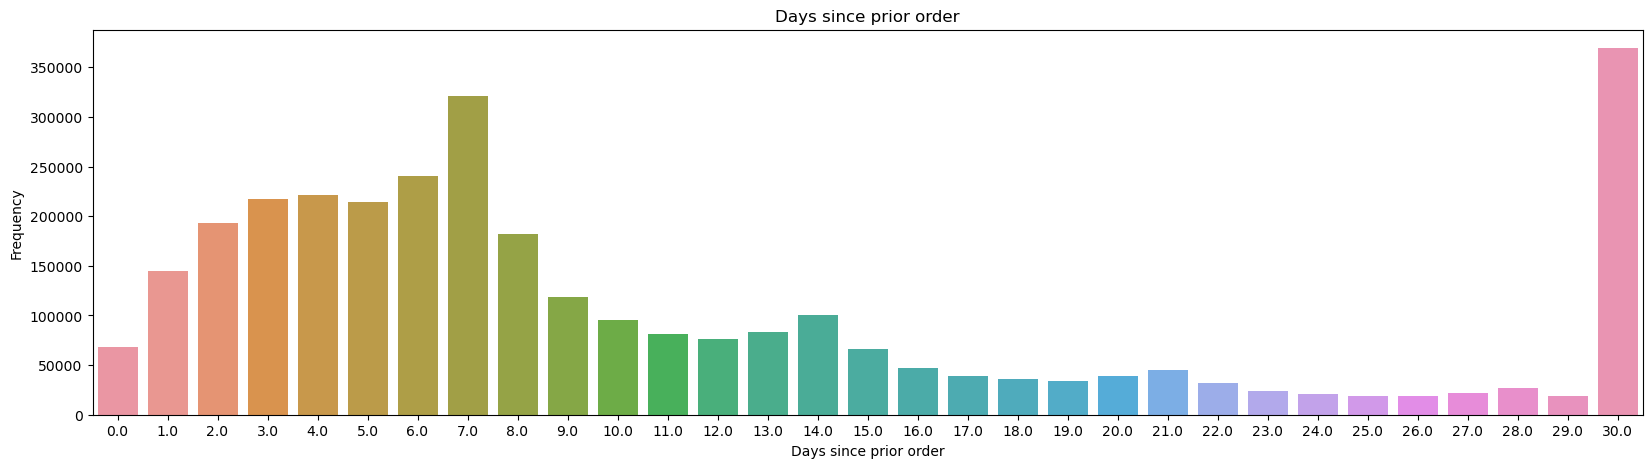

In [15]:


fig , axis = plt.subplots(figsize=(20 , 5))

axis =  sns.countplot( x = orders_df.days_since_prior_order)

axis.set_title('Days since prior order')

axis.set_xlabel('Days since prior order')

axis.set_ylabel('Frequency')

fig.savefig('img/Days since prior order.png')


### Which days to we record new user activity ? 

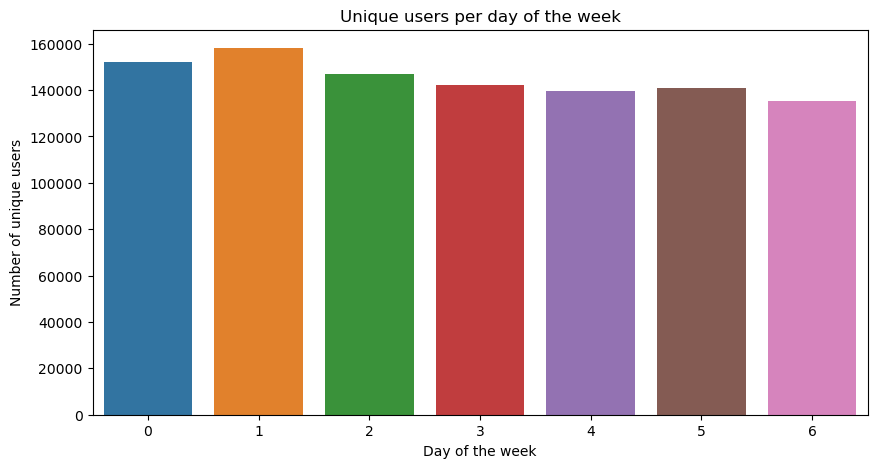

In [16]:
orders_df_by_unique_user =  orders_df.groupby('order_dow')['user_id'].nunique()

fig , axis = plt.subplots(figsize=(10 , 5))

axis = sns.barplot( x = orders_df_by_unique_user.index , y = orders_df_by_unique_user.values)

axis.set_title('Unique users per day of the week')

axis.set_xlabel('Day of the week')

axis.set_ylabel('Number of unique users')

fig.savefig('img/Unique users per day of the week.png')

## Order Products Prior

In [17]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [18]:
print("Number of unique orders" ,  len( order_products_prior_df.order_id.unique() ))
print("Number of unique products" ,  len( order_products_prior_df.product_id.unique() ))

Number of unique orders 3214874
Number of unique products 49677


In [19]:
print( "Max number of items in a cart" , max(order_products_prior_df.add_to_cart_order) )

Max number of items in a cart 145


### Let's see how many items an order would typically have

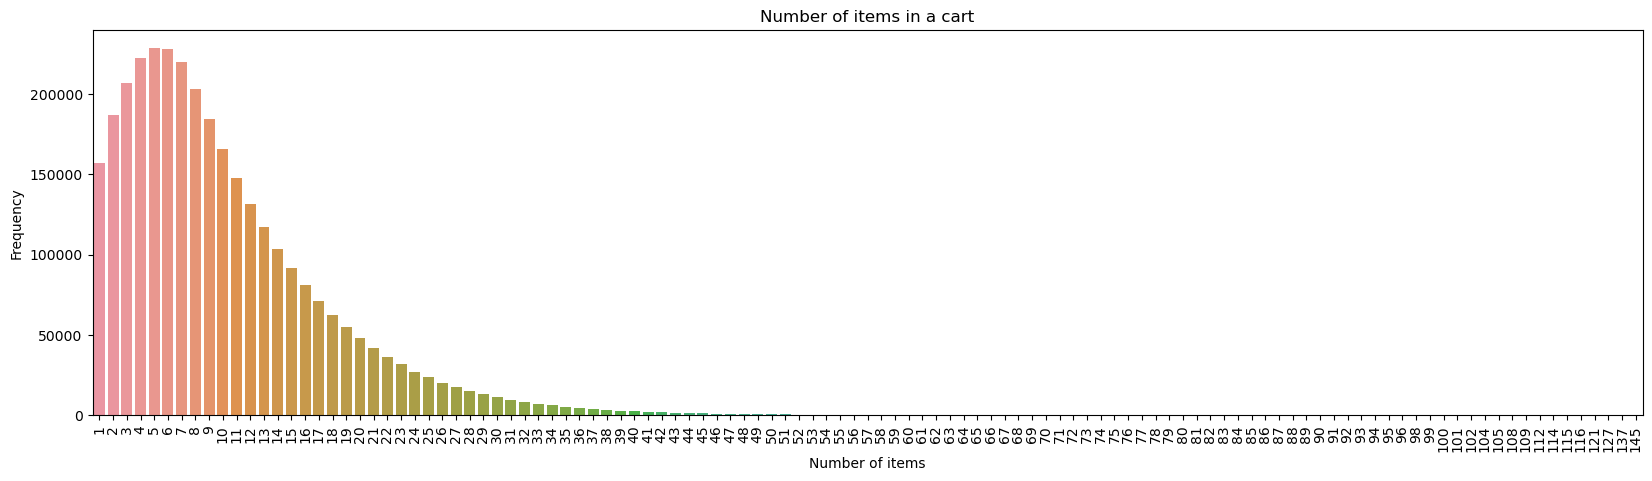

In [20]:
order_products_prior_df_by_order_cart = order_products_prior_df.groupby('order_id')['add_to_cart_order'].max()

order_products_prior_df_by_order_cart = order_products_prior_df_by_order_cart.value_counts()

fig , axis = plt.subplots(figsize=(20,5))


axis = sns.barplot( x = order_products_prior_df_by_order_cart.index , y = order_products_prior_df_by_order_cart.values)

axis.set_title('Number of items in a cart')

axis.set_xlabel('Number of items')

axis.set_ylabel('Frequency')

axis.xaxis.set_tick_params(rotation=90)

fig.savefig('img/Number of items in a cart.png')

In [21]:
# number of items that are reordered

print("Number of items that are reordered" , order_products_prior_df.reordered.sum())
print("Total number of items" , len(order_products_prior_df))

print("Percentage of items that are reordered" , (order_products_prior_df.reordered.sum()/len(order_products_prior_df)) * 100 )

Number of items that are reordered 19126536
Total number of items 32434489
Percentage of items that are reordered 58.969746679221615


## Product

In [22]:
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
product_df['aisle_name'] = product_df.aisle_id.map( aisles_df.aisle)
product_df['department_name'] = product_df.department_id.map( departments_df.department)

In [24]:
print( "does the aisle id match the number of aisle names" , len(product_df.aisle_id.unique()) == len(product_df.aisle_name.unique()) )
print( "does the department id match the number of  department names" , len(product_df.department_id.unique()) == len(product_df.department_name.unique())  )


does the aisle id match the number of aisle names True
does the department id match the number of  department names True


### Let's understand how product are grouped by Aisle

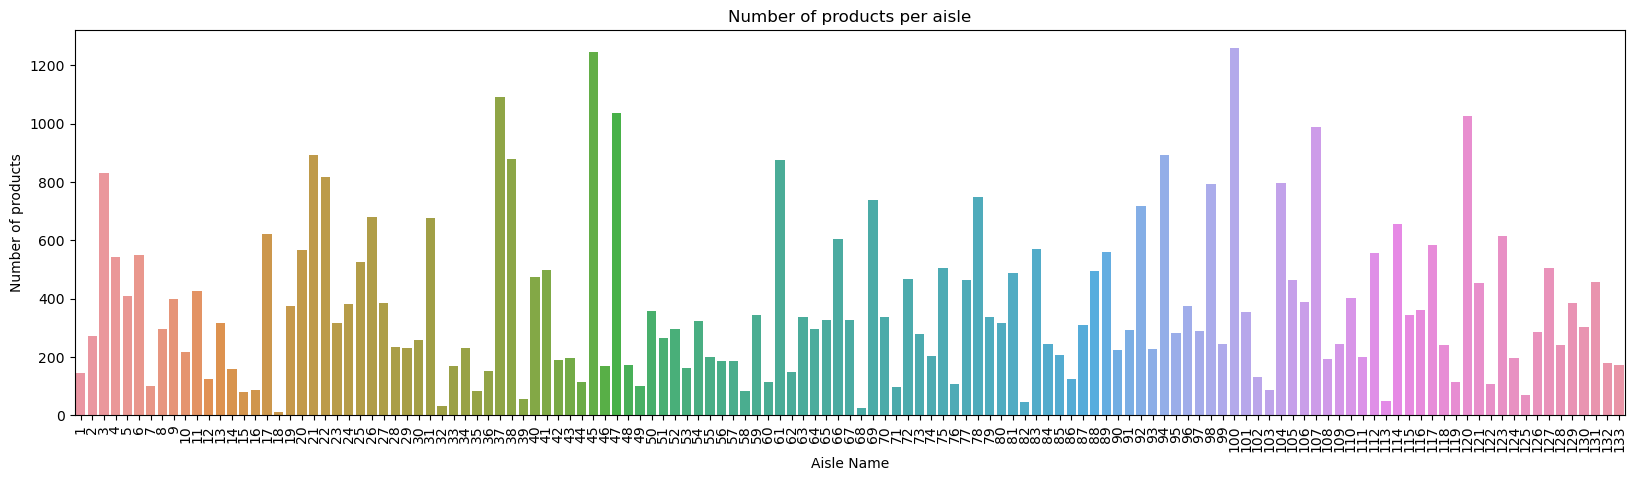

In [25]:
product_df_by_aisle = product_df.groupby(['aisle_id' ,  'aisle_name'])['product_id'].count().reset_index()

fig , axis =  plt.subplots( figsize=(20,5))

axis = sns.barplot( x = product_df_by_aisle.aisle_id , y = product_df_by_aisle.product_id)

axis.set_title('Number of products per aisle')

axis.set_xlabel('Aisle Name')

axis.xaxis.set_tick_params(rotation=90)

axis.set_ylabel('Number of products')

fig.savefig('img/Number of products per aisle.png')

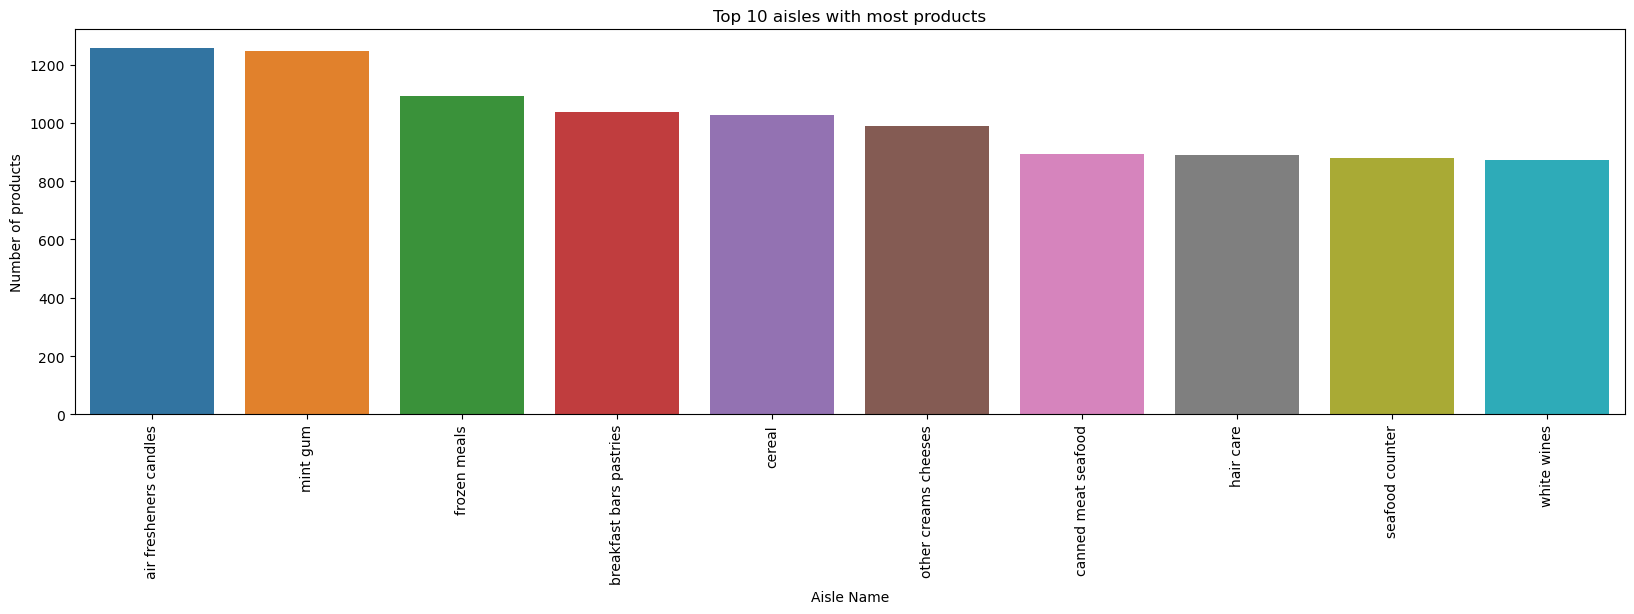

In [26]:
# lets see the top 10 aisles with most products

product_df_by_aisle = product_df_by_aisle.sort_values(by='product_id' , ascending=False)

fig , axis =  plt.subplots( figsize=(20,5))

axis = sns.barplot( x = product_df_by_aisle.aisle_name[:10] , y = product_df_by_aisle.product_id[:10])

axis.set_title('Top 10 aisles with most products')

axis.set_xlabel('Aisle Name')

axis.xaxis.set_tick_params(rotation=90)

axis.set_ylabel('Number of products')

fig.savefig('img/Top 10 aisles with most products.png')

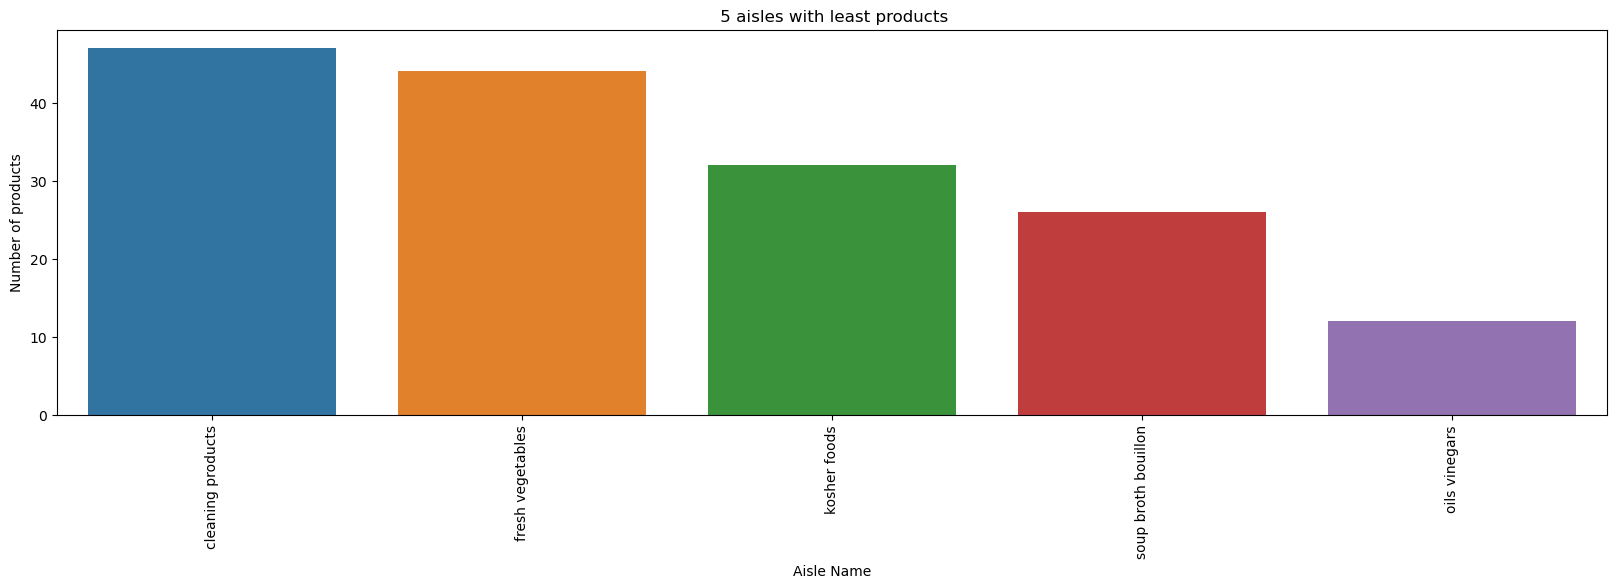

In [27]:
# lets see the least 5 aisles with least products 

fig , axis =  plt.subplots( figsize=(20,5))

axis = sns.barplot( x = product_df_by_aisle.aisle_name[-5:] , y = product_df_by_aisle.product_id[-5:])

axis.set_title(' 5 aisles with least products')

axis.set_xlabel('Aisle Name')

axis.xaxis.set_tick_params(rotation=90)

axis.set_ylabel('Number of products')

fig.savefig('img/5 aisles with least products.png')

### Let's understand how product's are grouped by department

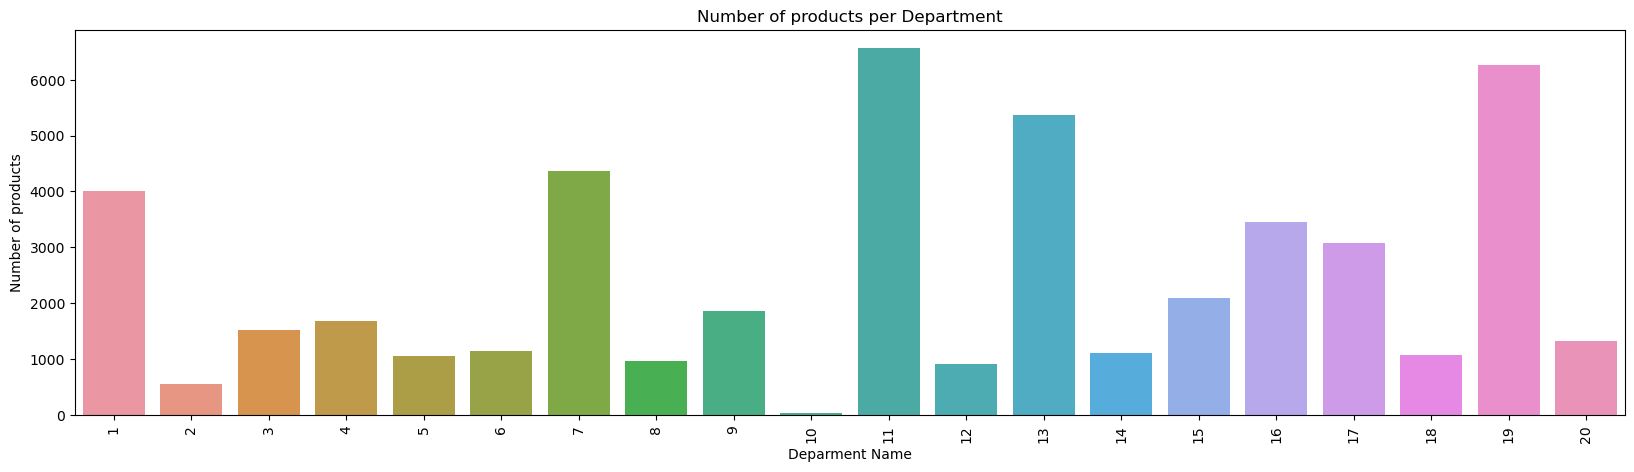

In [28]:
product_df_by_department = product_df.groupby(['department_id' ,  'department_name'])['product_id'].count().reset_index()

fig , axis =  plt.subplots( figsize=(20,5))

axis = sns.barplot( x = product_df_by_department.department_id , y = product_df_by_department.product_id )

axis.set_title('Number of products per Department')

axis.set_xlabel('Deparment Name')

axis.xaxis.set_tick_params(rotation=90)

axis.set_ylabel('Number of products')

fig.savefig('img/Number of products per department.png')

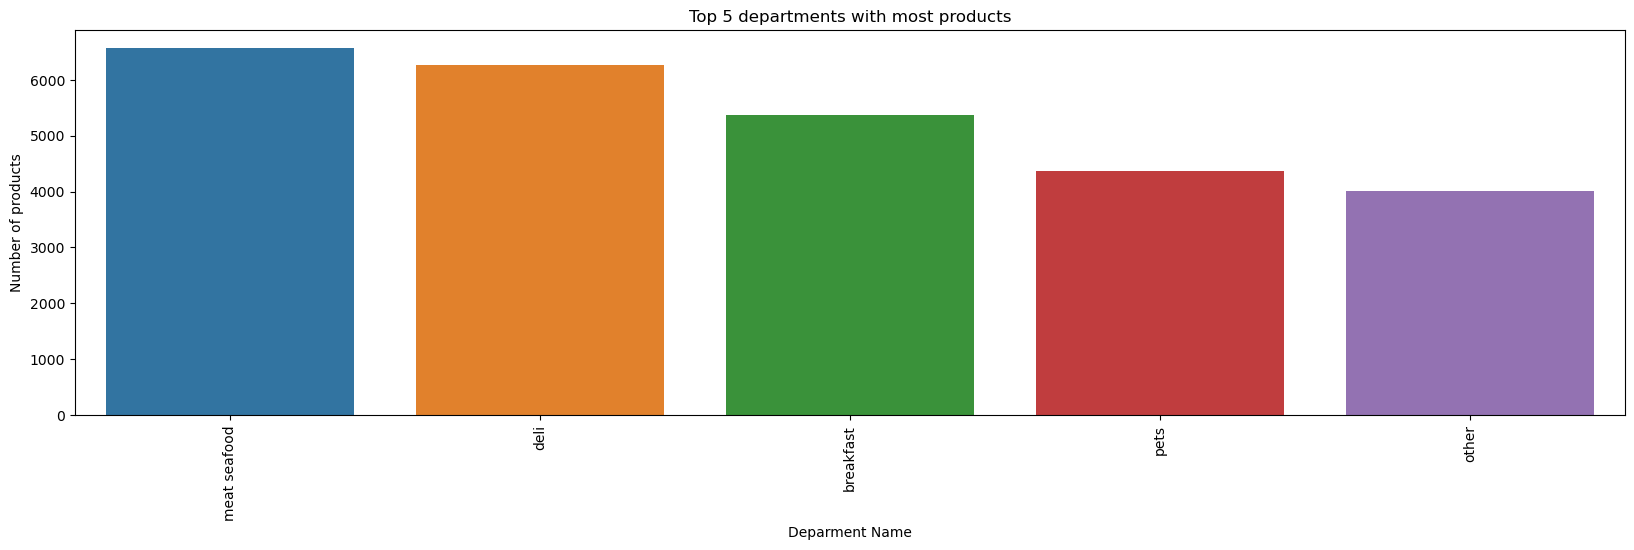

In [29]:
# top 5 departments with most products

product_df_by_department = product_df_by_department.sort_values(by='product_id' , ascending=False)

fig , axis =  plt.subplots( figsize=(20,5))

axis = sns.barplot( x = product_df_by_department.department_name[:5] , y = product_df_by_department.product_id[:5] )

axis.set_title('Top 5 departments with most products')

axis.set_xlabel('Deparment Name')

axis.xaxis.set_tick_params(rotation=90)

axis.set_ylabel('Number of products')

fig.savefig('img/Top 5 departments with most products.png')



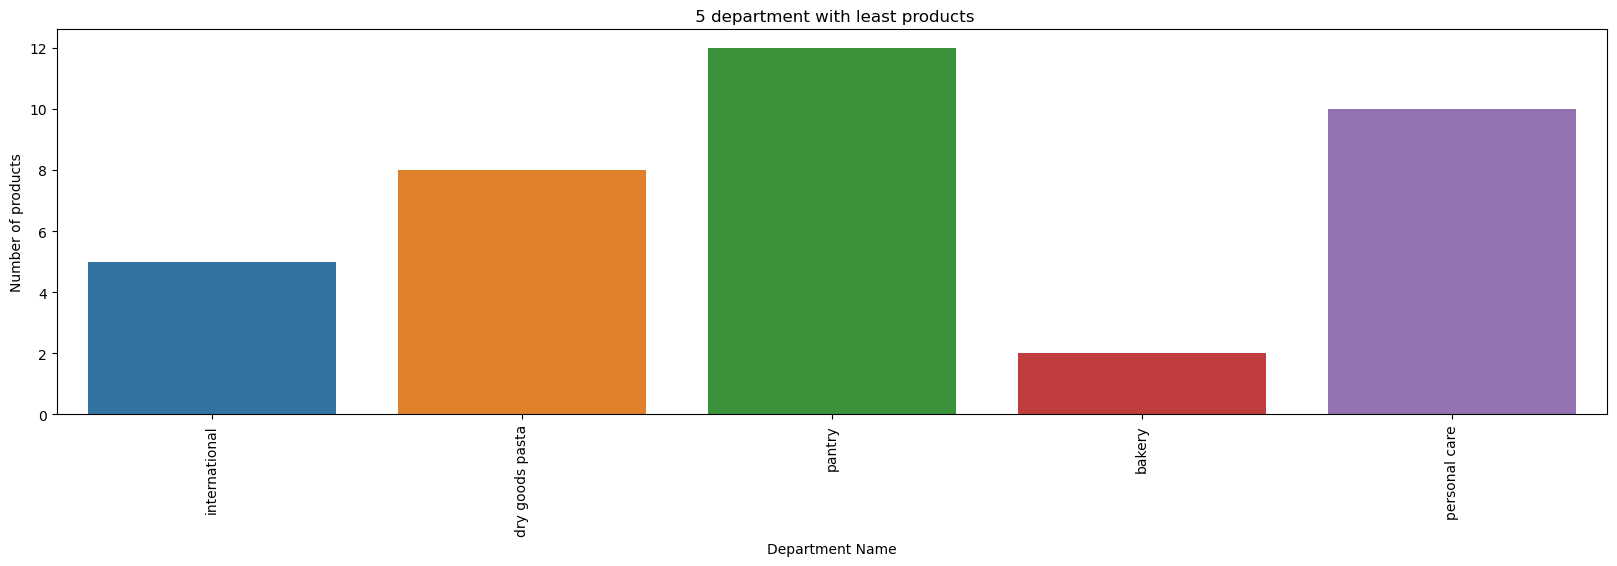

In [30]:
# lets see the least 5 department with least products 

fig , axis =  plt.subplots( figsize=(20,5))

axis = sns.barplot( x = product_df_by_department.department_name[-5:] , y = product_df_by_department.department_id[-5:])

axis.set_title(' 5 department with least products')

axis.set_xlabel('Department Name')

axis.xaxis.set_tick_params(rotation=90)

axis.set_ylabel('Number of products')

fig.savefig('img/5 department with least products.png')